### First thing first, Import nessesary packages to do analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read the original combined data from 2019 to 2023 and save them in a dataframe..

In [ ]:
# Run the main.py file first to generate merged original and cleaned data.........
# Then you will be able to run this file to see the data..........

df=pd.read_csv("Merge_Data/Orignal_data.csv",dtype=str)
df.head()

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_FR,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,TX_BUILD_UP_AREA_DESCR_FR,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,...,TX_PROV_DESCR_FR,CD_RGN_REFNIS,TX_RGN_DESCR_NL,TX_RGN_DESCR_FR,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2019-11-29 00:00:00,18,5,Vendredi,vrijdag,2,Buiten bebouwde kom,Hors agglomération,7,Tegen een hindernis buiten de rijbaan,...,Province d’Anvers,02000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
1,2019-12-11 00:00:00,18,3,Mercredi,woensdag,2,Buiten bebouwde kom,Hors agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,02000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
2,2019-12-30 00:00:00,13,1,Lundi,maandag,NaN,Niet beschikbaar,Non disponible,5,Met een voetganger,...,Province d’Anvers,02000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
3,2019-12-15 00:00:00,14,7,Dimanche,zondag,1,Binnen bebouwde kom,En agglomération,4,Langs opzij,...,Province d’Anvers,02000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
4,2019-11-27 00:00:00,9,3,Mercredi,woensdag,1,Binnen bebouwde kom,En agglomération,2,Frontale botsing (of bij het kruisen),...,Province d’Anvers,02000,Vlaams Gewest,Région flamande,1,0,0,0,0,1


#### Already from top 5 rows, we can see a few missing values, columns are too many and difficult to understand the name of columns..

In [40]:
df.shape
print(f"Original Data has {df.shape[0]} rows and {df.shape[1]} columns")

Original Data has 176277 rows and 35 columns


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176277 entries, 0 to 176276
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   DT_DAY                     176277 non-null  object
 1   DT_HOUR                    176277 non-null  object
 2   CD_DAY_OF_WEEK             176277 non-null  object
 3   TX_DAY_OF_WEEK_DESCR_FR    176277 non-null  object
 4   TX_DAY_OF_WEEK_DESCR_NL    176277 non-null  object
 5   CD_BUILD_UP_AREA           171786 non-null  object
 6   TX_BUILD_UP_AREA_DESCR_NL  176277 non-null  object
 7   TX_BUILD_UP_AREA_DESCR_FR  176277 non-null  object
 8   CD_COLL_TYPE               158028 non-null  object
 9   TX_COLL_TYPE_DESCR_NL      176277 non-null  object
 10  TX_COLL_TYPE_DESCR_FR      176277 non-null  object
 11  CD_LIGHT_COND              171313 non-null  object
 12  TX_LIGHT_COND_DESCR_NL     176277 non-null  object
 13  TX_LIGHT_COND_DESCR_FR     176277 non-null  

### Info of df shows most of column dtypes are object its because i give dtype str when i read the data to avoid warning.. we will do further investigation about this later.


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DT_HOUR,176277.0,14.336896,5.285070,-1.0,10.0,15.0,18.0,24.0
CD_DAY_OF_WEEK,176277.0,3.873948,1.920681,1.0,2.0,4.0,5.0,7.0
CD_MUNTY_REFNIS,176277.0,39734.393250,22706.205885,11001.0,21009.0,36015.0,57081.0,93090.0
CD_DSTR_REFNIS,176277.0,39701.475519,22695.204463,11000.0,21000.0,36000.0,57000.0,93000.0
CD_RGN_REFNIS,176277.0,2488.719459,678.048368,2000.0,2000.0,2000.0,3000.0,4000.0
MS_ACCT,176277.0,1.004867,0.071447,1.0,1.0,1.0,1.0,4.0
MS_ACCT_WITH_DEAD,176277.0,0.010813,0.103475,0.0,0.0,0.0,0.0,2.0
MS_ACCT_WITH_DEAD_30_DAYS,176277.0,0.014449,0.119380,0.0,0.0,0.0,0.0,2.0
MS_ACCT_WITH_MORY_INJ,176277.0,0.003636,0.060192,0.0,0.0,0.0,0.0,1.0
MS_ACCT_WITH_SERLY_INJ,176277.0,0.084957,0.278961,0.0,0.0,0.0,0.0,2.0


In [6]:
df.isnull().sum()

DT_DAY                           0
DT_HOUR                          0
CD_DAY_OF_WEEK                   0
TX_DAY_OF_WEEK_DESCR_FR          0
TX_DAY_OF_WEEK_DESCR_NL          0
CD_BUILD_UP_AREA              4491
TX_BUILD_UP_AREA_DESCR_NL        0
TX_BUILD_UP_AREA_DESCR_FR        0
CD_COLL_TYPE                 18249
TX_COLL_TYPE_DESCR_NL            0
TX_COLL_TYPE_DESCR_FR            0
CD_LIGHT_COND                 4964
TX_LIGHT_COND_DESCR_NL           0
TX_LIGHT_COND_DESCR_FR           0
CD_ROAD_TYPE                   431
TX_ROAD_TYPE_DESCR_NL            0
TX_ROAD_TYPE_DESCR_FR            0
CD_MUNTY_REFNIS                  0
TX_MUNTY_DESCR_NL                0
TX_MUNTY_DESCR_FR                0
CD_DSTR_REFNIS                   0
TX_ADM_DSTR_DESCR_NL             0
TX_ADM_DSTR_DESCR_FR             0
CD_PROV_REFNIS               10842
TX_PROV_DESCR_NL             10842
TX_PROV_DESCR_FR             10842
CD_RGN_REFNIS                    0
TX_RGN_DESCR_NL                  0
TX_RGN_DESCR_FR     

#### There are null values in the df, we will need to deal with them...

#### After seeing the original data, we need to follow some cleaning and validating steps. I do this process in another file name data_Processesor.py.


#### Let's upload the cleaned data to do analysis

In [42]:
cleaned_df = pd.read_csv("Merge_Data/Clean_data.csv")
cleaned_df.head()

,Hour,DayOfWeek,BuiltUpArea,CollisionType,LightCondition,RoadType,Municipality,District,Province,Region,Accident,AccidentsWithFatalities,AccidentsWithFatalities30Days,AccidentsWithMinorInjuries,AccidentsWithSeriousInjuries,AccidentsWithSlightInjuries,Year,Month,Day_of_Month,total_Deaths
0,18,vrijdag,Buiten bebouwde kom,Tegen een hindernis buiten de rijbaan,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,11,29,0
1,18,woensdag,Buiten bebouwde kom,Niet beschikbaar,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,12,11,0
2,13,maandag,Niet beschikbaar,Met een voetganger,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,12,30,0
3,14,zondag,Binnen bebouwde kom,Langs opzij,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,12,15,0
4,9,woensdag,Binnen bebouwde kom,Frontale botsing (of bij het kruisen),Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,11,27,0


#### Data cleaning, validating, transforming is the crucial steps to do data analysis. As we can see above clean_df, data is organized, more readable, validated data to do further analysis.

#### During this process i needed to do following steps:
 #### Rename the columns.
 #### Remove the unnesessory columns.
 #### Recheck the data types. and change to them correct data types.
 #### Trim the records.
 #### And feature engineering to the date column

In [43]:
cleaned_df.shape
print(f"Cleaned Data has {cleaned_df.shape[0]} rows and {cleaned_df.shape[1]} columns")
print(f"Original Data had {df.shape[0]} rows and {df.shape[1]} columns")

Cleaned Data has 176277 rows and 20 columns
Original Data had 176277 rows and 35 columns


In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176274 entries, 0 to 176273
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Hour                           176274 non-null  int64 
 1   DayOfWeek                      176274 non-null  object
 2   BuiltUpArea                    176274 non-null  object
 3   CollisionType                  176274 non-null  object
 4   LightCondition                 176274 non-null  object
 5   RoadType                       176274 non-null  object
 6   Municipality                   176274 non-null  object
 7   District                       176274 non-null  object
 8   Province                       176274 non-null  object
 9   Region                         176274 non-null  object
 10  Accident                       176274 non-null  int64 
 11  AccidentsWithFatalities        176274 non-null  int64 
 12  AccidentsWithFatalities30Days  176274 non-nu

In [10]:
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,176274.0,14.337157,5.284737,1.0,10.0,15.0,18.0,24.0
Accident,176274.0,1.004867,0.071447,1.0,1.0,1.0,1.0,4.0
AccidentsWithFatalities,176274.0,0.010801,0.103422,0.0,0.0,0.0,0.0,2.0
AccidentsWithFatalities30Days,176274.0,0.014438,0.119335,0.0,0.0,0.0,0.0,2.0
AccidentsWithMinorInjuries,176274.0,0.003636,0.060193,0.0,0.0,0.0,0.0,1.0
AccidentsWithSeriousInjuries,176274.0,0.084959,0.278963,0.0,0.0,0.0,0.0,2.0
AccidentsWithSlightInjuries,176274.0,0.905471,0.307151,0.0,1.0,1.0,1.0,4.0
Year,176274.0,2021.032172,1.437439,2019.0,2020.0,2021.0,2022.0,2023.0
Month,176274.0,6.699536,3.349823,1.0,4.0,7.0,10.0,12.0
Day_of_Month,176274.0,15.728094,8.705167,1.0,8.0,16.0,23.0,31.0


In [5]:
cleaned_df.isnull().sum()

Hour                             0
DayOfWeek                        0
BuiltUpArea                      0
CollisionType                    0
LightCondition                   0
RoadType                         0
Municipality                     0
District                         0
Province                         0
Region                           0
Accident                         0
AccidentsWithFatalities          0
AccidentsWithFatalities30Days    0
AccidentsWithMinorInjuries       0
AccidentsWithSeriousInjuries     0
AccidentsWithSlightInjuries      0
Year                             0
Month                            0
Day_of_Month                     0
total_Deaths                     0
dtype: int64

Hourly Distribution of Accidents:
 Hour
 17    15673
 18    15471
 16    13156
 19    12043
 9     11503
 15    10848
 13    10409
 14    10168
 12     9037
 20     8677
 8      8583
 11     7835
 10     7139
 21     6324
 22     5097
 23     4268
 7      4210
 24     3611
 1      2775
 6      2578
 2      2371
 3      1854
 5      1754
 4      1748
-1         3
Name: Accident, dtype: int64


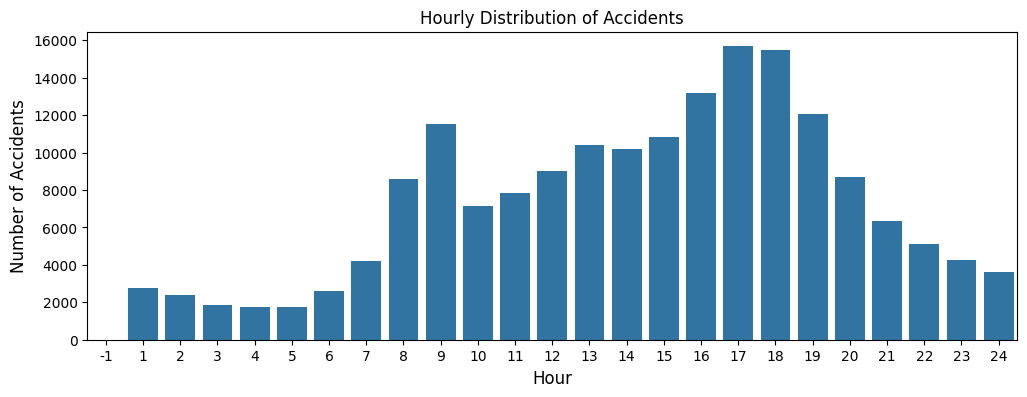

In [44]:
# Time Analysis: Distribution by Hour
hourly_distribution = cleaned_df.groupby(['Hour'])['Accident'].sum().sort_values(ascending=False)
print("Hourly Distribution of Accidents:\n", hourly_distribution)
plt.figure(figsize=(12,4))
sns.barplot (hourly_distribution)
plt.title('Hourly Distribution of Accidents')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Total Deaths in this 5 years: 4453
Total Deaths on the spot: 1906 and Total Deaths after 30 days: 2547
Yearly Distribution of Deaths:
 Year
2019    1065
2022     892
2021     853
2023     822
2020     821
Name: total_Deaths, dtype: int64


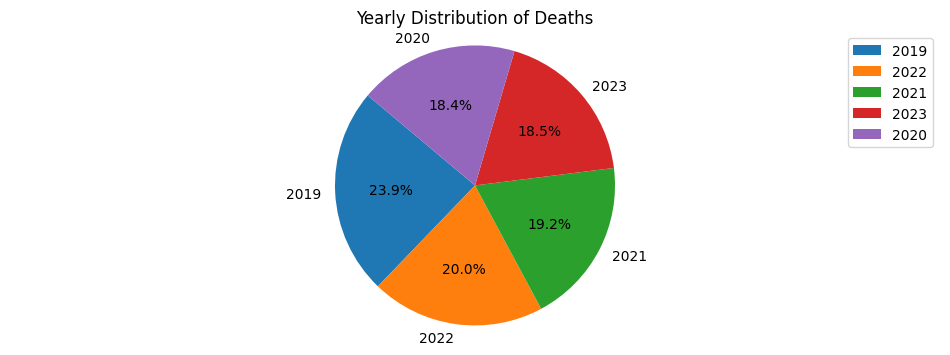

In [48]:
#Total Deaths in this 5 years
total_deaths = cleaned_df['total_Deaths'].sum()
print("Total Deaths in this 5 years:", total_deaths)

# death on the spot and death after 30 days
death_on_spot = cleaned_df['AccidentsWithFatalities'].sum()
death_after_30_days = cleaned_df['AccidentsWithFatalities30Days'].sum()

print(f'Total Deaths on the spot: {death_on_spot} and Total Deaths after 30 days: {death_after_30_days}')


#Yearly Distribution of deaths
yearly_distribution = cleaned_df.groupby(['Year'])['total_Deaths'].sum().sort_values(ascending=False)
print("Yearly Distribution of Deaths:\n", yearly_distribution)
fig,ax=plt.subplots(figsize=(12,4))
ax.pie(yearly_distribution, labels=yearly_distribution.index, autopct='%1.1f%%', startangle=140)
ax.axis('equal')
ax.set_title('Yearly Distribution of Deaths')
ax.legend(loc='upper right')
plt.show()


 Observation:
 
 Based on the hourly distribution of accidents, the highest number of accidents occur between 16:00 and 19:00, as well as around 8:00 and 9:00 in the morning. This pattern suggests that the primary reasons for these peaks could be related to people's daily routines. In the morning, individuals are likely rushing to get to work, school, or other commitments. 

 Similarly, in the evening, there is a rush to return home or pick up children. These timeframes coincide with higher traffic volumes on the roads, which in turn increases the likelihood of accidents. the data indicates that more cars on the road during these peak hours correlate with a higher incidence of accidents.

In [13]:
## Let us see the distribution of accidents by day of the week
daily_distribution=cleaned_df.groupby(['DayOfWeek'])['Accident'].sum()
print("Daily Distribution of Accidents:\n", daily_distribution)


Daily Distribution of Accidents:
 DayOfWeek
dinsdag      26824
donderdag    26984
maandag      25065
vrijdag      28890
woensdag     26962
zaterdag     22892
zondag       19515
Name: Accident, dtype: int64


Observation: 

Highest Accidents on Fridays: The data shows that the highest number of accidents occur on Fridays, with a total of 28,890 accidents. This could be attributed to the end-of-week rush, where people are eager to finish their workweek and start their weekend activities.

Lowest Accidents on Sundays: Sundays have the lowest number of accidents, with 19,515 incidents. This might be due to lighter traffic and fewer people commuting for work or school.

Weekday vs. Weekend: Generally, weekdays have higher accident rates compared to weekends. This aligns with typical commuting patterns, where there are more vehicles on the road during weekdays due to work and school.

Midweek Consistency: Tuesdays, Wednesdays, and Thursdays show similar accident counts, indicating a consistent level of traffic activity and potential accident risk during these days. 

Understanding these patterns can help in planning and implementing traffic safety measures to reduce accidents, especially during peak days and hours.

In [ ]:
# Let's see the distribution of accidents by month
monthly_distribution=cleaned_df.groupby(['Month'])['Accident'].sum()
print("Monthly Distribution of Accidents:\n", monthly_distribution)

Monthly Distribution of Accidents:
 Month
1     12984
2     12776
3     13137
4     12401
5     15862
6     17666
7     14574
8     14771
9     17827
10    16893
11    14531
12    13710
Name: Accident, dtype: int64


Observations:

Highest Accidents in September: The month of September has the highest number of accidents, with 17,827 incidents. This could be attributed to the return to regular routines after summer holidays, resulting in increased traffic.

June and October Peaks: June (17,666 accidents) and October (16,893 accidents) also show high numbers of accidents. These months might coincide with specific weather conditions or increased travel activities.

Spring and Summer: Accidents tend to rise in late spring and summer (May, June, July, and August), likely due to more outdoor activities, vacations, and potentially better weather leading to increased road usage.

Winter Months: Accident numbers in the winter months (January, February, and December) are relatively lower compared to the peaks in late spring and summer. However, they are still significant, possibly due to hazardous driving conditions like snow and ice. It might be people are more carefull because of cold, Ice, visuability etc.

In [15]:
# count of accidents by years
accidents_by_years = cleaned_df.groupby('Year')[['Accident']].sum()
print("Accidents by Year:\n", accidents_by_years.T, "\n")
print("-"*50)
# count how many percentage of each type  death,injury per year
accidents_by_years_percentage = cleaned_df.groupby('Year')[['AccidentsWithFatalities', 'AccidentsWithSeriousInjuries',
                                                            'AccidentsWithSlightInjuries', 'AccidentsWithMinorInjuries']].sum()
accidents_by_years_percentage = accidents_by_years_percentage.div(accidents_by_years['Accident'], axis=0)*100
print("Percentage of Accidents with Fatalities, Serious Injuries, Slight Injuries, Minor Injuries by Year:\n", accidents_by_years_percentage.T)

"""fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x=total_deaths_by_year.index, y=total_deaths_by_year['AccidentsWithFatalities30Days'], palette='viridis',saturation=0.75,hue=total_deaths_by_year.index,ax=ax[0])
plt.title('Total Deaths by Year')
plt.ylabel('Number of Deaths', fontsize=12)
plt.xlabel('Year', fontsize=12)
sns.barplot(x=total_deaths_by_year.index, y=total_deaths_by_year['AccidentsWithFatalities'], palette='viridis',saturation=0.75,hue=total_deaths_by_year.index,ax=ax[1])
plt.title('Total Deaths by Year')
plt.ylabel('Number of Deaths', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()"""


Accidents by Year:
 Year       2019   2020   2021   2022   2023
Accident  37718  30250  34659  37650  36855 

--------------------------------------------------
Percentage of Accidents with Fatalities, Serious Injuries, Slight Injuries, Minor Injuries by Year:
 Year                               2019       2020       2021       2022  \
AccidentsWithFatalities        1.211623   1.163636   1.056003   1.014608   
AccidentsWithSeriousInjuries   8.590063   9.038017   8.225858   8.262948   
AccidentsWithSlightInjuries   89.803277  89.418182  90.369024  90.382470   
AccidentsWithMinorInjuries     0.395037   0.380165   0.349116   0.339973   

Year                               2023  
AccidentsWithFatalities        0.941528  
AccidentsWithSeriousInjuries   8.248542  
AccidentsWithSlightInjuries   90.462624  
AccidentsWithMinorInjuries     0.347307  


"fig, ax = plt.subplots(1, 2, figsize=(15, 4))\nsns.barplot(x=total_deaths_by_year.index, y=total_deaths_by_year['AccidentsWithFatalities30Days'], palette='viridis',saturation=0.75,hue=total_deaths_by_year.index,ax=ax[0])\nplt.title('Total Deaths by Year')\nplt.ylabel('Number of Deaths', fontsize=12)\nplt.xlabel('Year', fontsize=12)\nsns.barplot(x=total_deaths_by_year.index, y=total_deaths_by_year['AccidentsWithFatalities'], palette='viridis',saturation=0.75,hue=total_deaths_by_year.index,ax=ax[1])\nplt.title('Total Deaths by Year')\nplt.ylabel('Number of Deaths', fontsize=12)\nplt.xlabel('Year', fontsize=12)\nplt.show()"

Ovservation: 

The yearly data reveals a significant reduction in total accidents in 2020, likely due to COVID-19 restrictions, followed by an increase in subsequent years, while consistently showing a downward trend in fatalities and serious injuries, indicating improved road safety and emergency response measures over time.


In [16]:
## Filter out rows where RoadType is "Onbekend"
filtered_df = cleaned_df[cleaned_df['RoadType'] != 'Onbekend']

# Group by RoadType and sum the relevant columns
road_type_distribution = filtered_df.groupby('RoadType')[['Accident', 'AccidentsWithFatalities', 'AccidentsWithFatalities30Days', 'AccidentsWithSeriousInjuries', 'AccidentsWithSlightInjuries', 'AccidentsWithMinorInjuries']].sum()

# Transpose for better readability
road_type_distribution_transposed = road_type_distribution.T

print("Road Type Distribution of Accidents:\n", road_type_distribution_transposed)


Road Type Distribution of Accidents:
 RoadType                       Autosnelweg  \
Accident                             13001   
AccidentsWithFatalities                355   
AccidentsWithFatalities30Days          402   
AccidentsWithSeriousInjuries          1062   
AccidentsWithSlightInjuries          11537   
AccidentsWithMinorInjuries              47   

RoadType                       Gewestweg, provincieweg of gemeenteweg  
Accident                                                       163471  
AccidentsWithFatalities                                          1539  
AccidentsWithFatalities30Days                                    2130  
AccidentsWithSeriousInjuries                                    13864  
AccidentsWithSlightInjuries                                    147477  
AccidentsWithMinorInjuries                                        591  


Observations:

Autosnelweg (Highway):

Highways account for a significant number of total accidents (13,001) but have a relatively lower fatality rate (355) compared to other road types.
Serious injuries and slight injuries are also substantial on highways, indicating high-speed impacts can still result in severe consequences.

Gewestweg, provincieweg of gemeenteweg (Regional, Provincial, or Municipal Roads):

These roads have the highest number of total accidents (163,471), likely due to their extensive network and usage by both local and through traffic.
They also show the highest numbers in all other categories: fatalities (1,539), fatalities within 30 days (2,130), serious injuries (13,864), slight injuries (147,477), and minor injuries (591). The higher numbers can be attributed to the mixed traffic conditions, varying road quality, and potential lack of stringent safety measures compared to highways.

In [17]:
# Which Regions have the most Accidents?
accidents_per_Regions = cleaned_df.groupby('Region')[['Accident', 'AccidentsWithFatalities', 'AccidentsWithFatalities30Days',
                                                         'AccidentsWithSeriousInjuries', 'AccidentsWithSlightInjuries', 
                                                         'AccidentsWithMinorInjuries']].sum() 
print("Accidents per Region:\n", accidents_per_Regions.T)


Accidents per Region:
 Region                         Brussels Hoofdstedelijk Gewest  Vlaams Gewest  \
Accident                                                18640         109211   
AccidentsWithFatalities                                    45            985   
AccidentsWithFatalities30Days                              68           1367   
AccidentsWithSeriousInjuries                              795          10667   
AccidentsWithSlightInjuries                             17777          97177   
AccidentsWithMinorInjuries                                 23            382   

Region                         Waals Gewest  
Accident                              49281  
AccidentsWithFatalities                 874  
AccidentsWithFatalities30Days          1110  
AccidentsWithSeriousInjuries           3514  
AccidentsWithSlightInjuries           44657  
AccidentsWithMinorInjuries              236  


The Vlaams Gewest records the highest number of accidents and injuries, reflecting the extensive road network and population density. In contrast, the Brussels Hoofdstedelijk Gewest has the lowest figures, likely due to effective urban traffic management.

In [18]:
# Regional Differences: Accidents per Province and type of Accident
accidents_per_province = cleaned_df.groupby('Province')[['Accident', 'AccidentsWithFatalities', 'AccidentsWithFatalities30Days',
                                                         'AccidentsWithSeriousInjuries', 'AccidentsWithSlightInjuries', 
                                                         'AccidentsWithMinorInjuries']].sum()
pd.DataFrame(accidents_per_province.sort_values(by='Accident', ascending=False))  
accidents_per_province


,Accident,AccidentsWithFatalities,AccidentsWithFatalities30Days,AccidentsWithSeriousInjuries,AccidentsWithSlightInjuries,AccidentsWithMinorInjuries
Province,,,,,,
Brussels,18640,45,68,795,17777,23
Provincie Antwerpen,32701,245,346,2969,29386,101
Provincie Henegouwen,17228,307,386,1367,15475,79
Provincie Limburg,13418,167,232,1127,12059,65
Provincie Luik,15812,216,293,974,14545,77
Provincie Luxemburg,4224,124,147,446,3631,23
Provincie Namen,7003,159,199,464,6340,40
Provincie Oost-Vlaanderen,27965,217,313,2946,24706,96
Provincie Vlaams-Brabant,14722,144,192,1215,13315,48


Observations:

Antwerpen: Highest total accidents (32,701) and slight injuries (29,386), indicating significant traffic activity.

Brussels: Significant accidents (18,640) but relatively low fatalities (45) and serious injuries (795), likely due to effective urban traffic management.

Henegouwen: High fatality rate (307) and serious injuries (1,367), highlighting the need for safety improvements.

Other Provinces: Moderate to high accident rates and injuries, with specific provinces showing higher fatalities and serious injuries that might need targeted safety measures.

In [ ]:
# Let's see the distribution of accidents by Municipality
accidents_per_municipality = cleaned_df.groupby('Municipality')[['Accident','AccidentsWithFatalities','AccidentsWithSeriousInjuries',
                                                                 'AccidentsWithFatalities30Days', 'AccidentsWithSlightInjuries']].sum()
top_10_municipalities = accidents_per_municipality.nlargest(10, 'Accident')
top_10_municipalities

,Accident,AccidentsWithFatalities,AccidentsWithSeriousInjuries,AccidentsWithFatalities30Days,AccidentsWithSlightInjuries
Municipality,,,,,
Antwerpen,12283,42,806,66,11411
Brussel,6302,16,282,25,5995
Gent,6167,24,473,39,5655
Luik,3749,25,130,35,3584
Charleroi,3290,32,205,43,3042
Brugge,2613,23,224,28,2361
Leuven,2168,6,140,10,2018
Anderlecht,1922,8,73,12,1837
Sint-Niklaas (Sint-Niklaas),1906,10,170,16,1720


Top 10 Municipalities with the Most Accidents: 

Antwerpen has the highest number of accidents, followed by Brussel and Gent, indicating significant traffic activity in these areas. Safety improvements and infrastructure enhancements are essential in these municipalities to reduce accidents and injuries

In [ ]:
# Lets see the distribution of accidents by District
accidents_per_district = cleaned_df.groupby('District')[['Accident','AccidentsWithFatalities','AccidentsWithFatalities30Days',
                                                         'AccidentsWithSeriousInjuries', 'AccidentsWithSlightInjuries']].sum()
top_10_districts = accidents_per_district.nlargest(10, 'Accident')
top_10_districts


,Accident,AccidentsWithFatalities,AccidentsWithFatalities30Days,AccidentsWithSeriousInjuries,AccidentsWithSlightInjuries
District,,,,,
Arrondissement Antwerpen,21346,118,172,1655,19519
Arrondissement Brussel-Hoofdstad,18640,45,68,795,17777
Arrondissement Gent,11127,74,104,1069,9954
Arrondissement Luik,9264,87,129,424,8711
Arrondissement Halle-Vilvoorde,8151,76,101,595,7455
Arrondissement Hasselt,6960,71,101,556,6303
Arrondissement Turnhout,6825,84,113,721,5991
Arrondissement Leuven,6571,68,91,620,5860
Arrondissement Brugge,5941,53,69,655,5217


Observations:

Arrondissement Antwerpen: Highest number of total accidents (21,346) and slight injuries (19,519), indicating significant traffic activity.

Arrondissement Brussel-Hoofdstad: Significant number of accidents (18,640) with relatively low fatalities (45) and serious injuries (795).

Arrondissement Gent: High number of accidents (11,127) and serious injuries (1,069), suggesting busy traffic conditions.

Arrondissement Luik: Moderate total accidents (9,264) with a concerning number of fatalities (87).

Arrondissement Halle-Vilvoorde: Significant accidents (8,151) and fatalities (76), highlighting the need for safety improvements.

Arrondissement Hasselt: Moderate accidents (6,960) with relatively high fatalities (71) considering the total accidents.

Arrondissement Turnhout: Similar pattern to Hasselt with moderate accidents (6,825) and serious injuries (721).

Arrondissement Leuven: Lower total accidents (6,571) but notable serious injuries (620).

Arrondissement Brugge: Moderate accidents (5,941) with a fair number of serious injuries (655).

Arrondissement Sint-Niklaas: Lowest in the top 10 with 5,602 accidents and 613 serious injuries.

In [21]:
# Three provinces with most accidents(Antwerpen, Oost-Vlaanderen, henegouwen) investigation.
accidents_in_Antwerpen = cleaned_df[cleaned_df['Province'] == 'Provincie Antwerpen']
accidents_in_Antwerpen = accidents_in_Antwerpen.groupby('Municipality')[['Accident','AccidentsWithFatalities','AccidentsWithFatalities30Days']].sum()
top_10_municipalities = accidents_in_Antwerpen.nlargest(10, 'Accident')
top_10_municipalities.sort_values(by='Accident', ascending=False)



,Accident,AccidentsWithFatalities,AccidentsWithFatalities30Days
Municipality,,,
Antwerpen,12283,42,66
Mechelen,1223,8,9
Turnhout,901,4,5
Brasschaat,699,2,5
Schoten,682,5,8
Geel,655,12,15
Lier,609,3,7
Kontich,589,1,2
Herentals,571,3,4


Observation:

The city of Antwerpen has the highest number of accidents, followed by Mechelen and Turnhout.

Geel has a significant number of accidents with fatalities, indicating a higher severity of accidents compared to other municipalities.

Smaller municipalities like Kontich and Brasschaat have lower accident numbers but still experience serious accidents.

In [22]:

accidents_in_Oost_Vlaanderen = cleaned_df[cleaned_df['Province'] == 'Provincie Oost-Vlaanderen']
accidents_in_Oost_Vlaanderen = accidents_in_Oost_Vlaanderen.groupby('Municipality')[['Accident','AccidentsWithFatalities','AccidentsWithFatalities30Days']].sum()
top_10_municipalities = accidents_in_Oost_Vlaanderen.nlargest(10, 'Accident')
top_10_municipalities.sort_values(by='Accident', ascending=False)

,Accident,AccidentsWithFatalities,AccidentsWithFatalities30Days
Municipality,,,
Gent,6167,24,39
Sint-Niklaas (Sint-Niklaas),1906,10,16
Aalst (Aalst),1392,7,11
Beveren (Sint-Niklaas),1091,13,18
Lokeren,977,6,9
Dendermonde,841,4,6
Temse,672,7,7
Ninove,634,7,9
Deinze,628,5,6


Observation:

Gent has the highest number of accidents and fatalities, making it the most critical area for interventions.

Beveren (Sint-Niklaas) stands out for having a relatively high number of fatalities, despite not having the highest total number of accidents.

Sint-Niklaas (Sint-Niklaas) and Aalst (Aalst) also have significant numbers of accidents and fatalities.

Smaller municipalities like Temse and Ninove experience severe accidents, indicating areas that might need targeted safety measures.

In [23]:

accidents_in_Henegouwen = cleaned_df[cleaned_df['Province'] == 'Provincie Henegouwen']
accidents_in_Henegouwen = accidents_in_Henegouwen.groupby('Municipality')[['Accident','AccidentsWithFatalities','AccidentsWithFatalities30Days']].sum()
top_10_municipalities = accidents_in_Henegouwen.nlargest(10, 'Accident')
top_10_municipalities.sort_values(by='Accident', ascending=False)

,Accident,AccidentsWithFatalities,AccidentsWithFatalities30Days
Municipality,,,
Charleroi,3290,32,43
Doornik,1209,26,31
Bergen,1077,28,36
La Louvière,962,8,15
Moeskroen,816,7,10
Aat,460,11,11
Châtelet,434,5,5
Courcelles,346,6,7
Binche,344,3,5


Observation:

Charleroi has the highest number of accidents and fatalities, making it a critical area for intervention.

Doornik and Bergen have significant numbers of accidents with fatalities, indicating areas with higher accident severity.

La Louvière and Moeskroen have notable numbers of accidents with fatalities, despite having fewer total accidents compared to Charleroi.

Smaller municipalities like Aat and Fleurus also experience severe accidents, suggesting the need for targeted safety measures.

In [24]:
# Type of Road where the most accidents occur per Province
road_type_per_province = cleaned_df.groupby(['Province', 'RoadType'])[['Accident']].sum()
# Top 10 results
road_type_per_province = road_type_per_province.nlargest(20, 'Accident')
print("Type of Road where the most accidents occur per Province:\n", road_type_per_province)

Type of Road where the most accidents occur per Province:
                                                                   Accident
Province                  RoadType                                        
Provincie Antwerpen       Gewestweg, provincieweg of gemeenteweg     29857
Provincie Oost-Vlaanderen Gewestweg, provincieweg of gemeenteweg     25914
Provincie West-Vlaanderen Gewestweg, provincieweg of gemeenteweg     19261
Brussels                  Gewestweg, provincieweg of gemeenteweg     18241
Provincie Henegouwen      Gewestweg, provincieweg of gemeenteweg     15787
Provincie Luik            Gewestweg, provincieweg of gemeenteweg     14291
Provincie Limburg         Gewestweg, provincieweg of gemeenteweg     12725
Provincie Vlaams-Brabant  Gewestweg, provincieweg of gemeenteweg     12400
Provincie Namen           Gewestweg, provincieweg of gemeenteweg      6530
Provincie Waals-Brabant   Gewestweg, provincieweg of gemeenteweg      4582
Provincie Luxemburg       Gewestweg, prov

Artical: """From 1 January 2017, we will all drive a bit slower on the Flemish regional roads. From then on, 70 will be the rule on regional roads, 90 will be the exception. This is an initiative of Flemish Minister of Mobility Ben Weyts (N-VA) to put an end to the 390 traffic deaths that occurred on Flemish roads in 2015.

On the so-called regional roads, the speed limit will be generally reduced to 70 km/h. Even where you used to be allowed to drive 90 km/h. Lorries + 7.5 tonnes may only drive 60 km/h on regional roads. But beware: the traffic signs take precedence over the traffic regulations. They can therefore impose a different maximum speed. This can be a higher or a lower speed! If there are signs that impose a maximum of 70 km/h, then this speed also applies to heavy lorries."""


Observation:

Gewestweg, Provincieweg, or Gemeenteweg is the road type with the most accidents across all provinces. This indicates that regional, provincial, or municipal roads are high-risk areas for traffic accidents.

Provincie Antwerpen has the highest number of accidents on both Gewestweg, Provincieweg or Gemeenteweg and Autosnelweg, making it a critical area for road safety measures.

Brussels and Provincie Oost-Vlaanderen also have significant accident numbers on regional, provincial, or municipal roads.

Provincie Vlaams-Brabant has a notable number of highway accidents compared to other provinces.

Highways generally have fewer accidents compared to regional, provincial, or municipal roads, but they still present significant risks in provinces like Antwerpen, Vlaams-Brabant, and Oost-Vlaanderen.

In [39]:
# Filter out rows where LightCondition is 'Niet beschikbaar'
filtered_df = cleaned_df[cleaned_df['LightCondition'] != 'Niet beschikbaar']
# Group by 'Province' and 'LightCondition', then sum the 'Accident' counts
accidents_light_conditions = filtered_df.groupby(['Province', 'LightCondition'])['Accident'].sum()
accidents_light_conditions 

Province                   LightCondition                       
Brussels                   Bij klaarlichte dag                      12672
                           Dageraad - schemering                      656
                           Nacht, geen openbare verlichting            77
                           Nacht, ontstoken openbare verlichting     4392
Provincie Antwerpen        Bij klaarlichte dag                      23201
                           Dageraad - schemering                     1839
                           Nacht, geen openbare verlichting           457
                           Nacht, ontstoken openbare verlichting     5700
Provincie Henegouwen       Bij klaarlichte dag                      10884
                           Dageraad - schemering                      685
                           Nacht, geen openbare verlichting           499
                           Nacht, ontstoken openbare verlichting     4377
Provincie Limburg          Bij klaarlichte dag 

Observation:

Daylight Conditions: Most accidents occur during the day, with the highest numbers in Provincie Antwerpen, Provincie Oost-Vlaanderen, and Provincie West-Vlaanderen.

Dawn-Dusk Conditions: Accidents during dawn and dusk are fewer but still significant. Provincie Antwerpen and Provincie Oost-Vlaanderen lead in this category.

Night without Public Lighting: Fewer accidents occur at night without public lighting, with Provincie Oost-Vlaanderen and Provincie West-Vlaanderen reporting the highest numbers.

Night with Public Lighting: A considerable number of accidents happen at night with public lighting, notably in Provincie Antwerpen, Provincie Oost-Vlaanderen, and Brussels.


In [26]:
# Collision Type and Impact
filtered_df = cleaned_df[cleaned_df['CollisionType'] != 'Niet beschikbaar']
collision_type_impact = filtered_df.groupby(['Year','CollisionType'])["Accident"].sum()
print("Impact of Collision Types:\n", collision_type_impact)

Impact of Collision Types:
 Year  CollisionType                         
2019  Eén bestuurder, geen hindernis             2288
      Frontale botsing (of bij het kruisen)      2553
      Kettingbotsing (4 bestuurders of meer)     1411
      Langs achteren (of naast elkaar)           5110
      Langs opzij                               10971
      Met een voetganger                         4178
      Tegen een hindernis buiten de rijbaan      4596
      Tegen een hindernis op de rijbaan           663
2020  Eén bestuurder, geen hindernis             2141
      Frontale botsing (of bij het kruisen)      2024
      Kettingbotsing (4 bestuurders of meer)      923
      Langs achteren (of naast elkaar)           3729
      Langs opzij                                8951
      Met een voetganger                         2906
      Tegen een hindernis buiten de rijbaan      3702
      Tegen een hindernis op de rijbaan           702
2021  Eén bestuurder, geen hindernis             2577
      Fro

Observation:

Side impacts(Langs opzij) and rear-end or alongside(Langs achteren of naast elkaar) collisions are the most frequent types of accidents, indicating areas where safety interventions could be most impactful.

Pedestrian(Met een voetganger)-involved accidents and collisions with obstacles both on and off the road(Tegen een hindernis op de rijbaan and Tegen een hindernis buiten de rijbaan) are significant, emphasizing the need for comprehensive road safety measures.

The year 2020 saw a noticeable reduction in accidents across most types, likely due to reduced traffic during the COVID-19 pandemic. However, numbers have since rebounded, underscoring the persistent nature of these issues.

In [27]:
# Check the impact of Built-up Area on accidents
filtered_df = cleaned_df[cleaned_df['BuiltUpArea'] != 'Niet beschikbaar']
accidents_built_up_area = filtered_df.groupby(["Year","BuiltUpArea"])[['Accident']].sum()
print("Impact of Built-up Area on Accidents:\n", accidents_built_up_area)

Impact of Built-up Area on Accidents:
                           Accident
Year BuiltUpArea                  
2019 Binnen bebouwde kom     22348
     Buiten bebouwde kom     13943
2020 Binnen bebouwde kom     17947
     Buiten bebouwde kom     11100
2021 Binnen bebouwde kom     20482
     Buiten bebouwde kom     12755
2022 Binnen bebouwde kom     22653
     Buiten bebouwde kom     13470
2023 Binnen bebouwde kom     21630
     Buiten bebouwde kom     13355


Observations

Higher Accident Numbers in Built-up Areas:

Consistently, there are more accidents within built-up areas compared to outside built-up areas. This could be due to higher traffic volumes, more intersections, and greater pedestrian activity in urban areas.

Decreased Accidents in 2020:

Both built-up and non-built-up areas saw a notable decrease in accidents in 2020. This reduction is likely due to the COVID-19 pandemic, which resulted in lockdowns and reduced traffic volumes.

Rebound in 2021-2023:

The number of accidents increased again from 2021 onwards, reaching pre-pandemic levels. This suggests a return to normal traffic conditions and indicates that the factors contributing to accidents in built-up areas remain prevalent.

Persistent Issues in Built-up Areas:

The data shows that built-up areas consistently report higher accident numbers, highlighting the need for targeted road safety measures in urban settings. Factors such as pedestrian safety, traffic management, and intersection safety are critical areas for intervention.

Stable Accident Numbers Outside Built-up Areas:

While the numbers are lower outside built-up areas, they remain significant. This suggests the need for continued focus on road safety in rural and less densely populated areas, particularly for issues like speeding and road design.

In [ ]:
#provinces with the most accidents in built-up areas
accidents_built_up_area_per_province = filtered_df.groupby(['Province','BuiltUpArea'])[['Accident']].sum()
print("Provinces with the most accidents in built-up areas:\n", accidents_built_up_area_per_province)

Provinces with the most accidents in built-up areas:
                                                Accident
Province                  BuiltUpArea                  
Brussels                  Binnen bebouwde kom     17593
                          Buiten bebouwde kom       409
Provincie Antwerpen       Binnen bebouwde kom     18634
                          Buiten bebouwde kom     12352
Provincie Henegouwen      Binnen bebouwde kom     10845
                          Buiten bebouwde kom      5716
Provincie Limburg         Binnen bebouwde kom      4582
                          Buiten bebouwde kom      8336
Provincie Luik            Binnen bebouwde kom     10155
                          Buiten bebouwde kom      4779
Provincie Luxemburg       Binnen bebouwde kom      1457
                          Buiten bebouwde kom      2638
Provincie Namen           Binnen bebouwde kom      2840
                          Buiten bebouwde kom      3811
Provincie Oost-Vlaanderen Binnen bebouwde kom     

 De bebouwde kom is een gebied waarvan de invalswegen worden aangegeven door een van de bovenste aanwijzingsborden. Je verlaat een bebouwde kom, zodra je voorbij een van de onderste borden rijdt. Het gele bord met rode rand geeft enkel het administratieve begin van een gemeente aan. In Vlaanderen en Wallonië bedraagt de maximumsnelheid binnen de bebouwde kom 50 km/u. In tegenstelling tot Brussel, waar de maximumsnelheid 30 km/u bedraagt.

 Buiten de bebouwde kom is de maximumsnelheid 70 km/u. Er moet dus geen verkeersbord geplaatst worden om je aan deze limiet te doen herinneren. Let op, in Wallonië en het Brusselse Hoofdstedelijke Gewest is de maximumsnelheid buiten de bebouwde kom nog steeds 90 km/u.

Observations: 

Higher Accidents Within Built-up Areas:

Across most provinces, the number of accidents is higher within built-up areas compared to outside built-up areas. This trend is especially pronounced in urban regions like Brussels and Provincie Antwerpen.

Significant Difference in Provincial Limburg:

Provincie Limburg is an exception with more accidents outside built-up areas (8,336) compared to within built-up areas (4,582). This indicates that road safety issues in rural or less populated areas are a significant concern in Limburg.

Urban vs. Rural Contrast:

In densely populated provinces like Brussels and Antwerpen, a majority of accidents occur within built-up areas due to higher traffic density, more intersections, and greater pedestrian activity.

Rural provinces like Luxemburg and Waals-Brabant show fewer accidents overall, but the numbers are relatively balanced between built-up and non-built-up areas.

Provinces with High Built-up Area Accidents:

Provincie Antwerpen (18,634) and Provincie Oost-Vlaanderen (16,246) have high numbers of accidents within built-up areas, emphasizing the need for urban road safety measures.

Data Consistency:

The trend of higher accidents within built-up areas is consistent across multiple provinces, highlighting the persistent nature of traffic safety challenges in urban areas.

In [38]:
# Accidents in Auto Snelweg Vs Gewestweg..
accidents_auto_snelwegen = cleaned_df[cleaned_df['RoadType'] == 'Autosnelweg']
accidents_auto_snelwegen = accidents_auto_snelwegen.groupby('Year')[['Accident','AccidentsWithFatalities','AccidentsWithFatalities30Days','AccidentsWithSeriousInjuries']].sum()
print("Number of accidents in Auto Snelwegen:\n", accidents_auto_snelwegen.T)
print()
accidents_autostrades = cleaned_df[cleaned_df['RoadType'] =='Gewestweg, provincieweg of gemeenteweg']
accidents_autostrades = accidents_autostrades.groupby('Year')[['Accident','AccidentsWithFatalities','AccidentsWithFatalities30Days','AccidentsWithSeriousInjuries']].sum()
print("Number of accidents in AutoRoad:\n", accidents_autostrades.T)

Number of accidents in Auto Snelwegen:
 Year                           2019  2020  2021  2022  2023
Accident                       2971  2043  2525  2702  2760
AccidentsWithFatalities          89    70    68    67    61
AccidentsWithFatalities30Days   106    76    75    76    69
AccidentsWithSeriousInjuries    285   174   207   196   200

Number of accidents in AutoRoad:
 Year                            2019   2020   2021   2022   2023
Accident                       34589  28067  32028  34823  33964
AccidentsWithFatalities          365    280    298    315    281
AccidentsWithFatalities30Days    497    389    411    432    401
AccidentsWithSeriousInjuries    2946   2550   2634   2903   2831


Observations:

Overall Trends:

Auto Snelwegen: The number of accidents and fatalities on highways showed a noticeable dip in 2020, likely due to reduced traffic during the COVID-19 pandemic. The numbers have since rebounded but remain somewhat stable from 2021 to 2023.

AutoRoad: Similarly, accidents and fatalities on main roads decreased significantly in 2020 but have since increased. The numbers indicate a return to pre-pandemic traffic conditions.

Accidents and Fatalities:

Highways (Auto Snelwegen) report significantly lower accident numbers compared to main roads (AutoRoad). However, the relative consistency in serious injuries and fatalities highlights the need for continued safety measures on highways.

Serious Injuries:

Both highways and main roads report a considerable number of serious injuries, emphasizing the severity of traffic accidents on these road types. Autostrades, given their higher accident numbers, naturally report more serious injuries.

Fatality Trends:

The number of fatalities within 30 days of accidents is slightly higher than the immediate fatalities, indicating the critical importance of timely medical intervention and road safety measures.

In [30]:
accidents_with_voetgangers = cleaned_df[cleaned_df['CollisionType'] == 'Met een voetganger']
accidents_with_voetgangers = accidents_with_voetgangers.groupby('Year')[['Accident','AccidentsWithFatalities','AccidentsWithFatalities30Days','AccidentsWithSeriousInjuries']].sum()
print("Number of accidents with Voetgangers:\n", accidents_with_voetgangers.T)


Number of accidents with Voetgangers:
 Year                           2019  2020  2021  2022  2023
Accident                       4178  2906  3475  3737  3721
AccidentsWithFatalities          61    37    47    48    47
AccidentsWithFatalities30Days    85    61    73    73    71
AccidentsWithSeriousInjuries    451   319   342   386   416
